In [43]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import animation

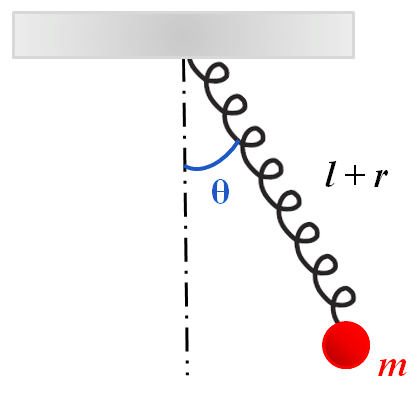

In [44]:
t,g = smp.symbols('t g')
m = smp.symbols('m')
l = smp.symbols('l')
k = smp.symbols('k')

$\theta$ and $x$ are the generalised coordinates to define the kinematics and dynamics of our system. Since they are the STATE VARIABLES, they must be defined as follows to make them time dependant:

In [45]:
the, x = smp.symbols(r'\theta, x', cls=smp.Function)

Explicitly write them as functions of time $t$:

In [46]:
the = the(t)
x = x(t)

Find the derivatives: $\dot\theta$, $\dot x$, $\ddot\theta$, $\ddot x$

In [47]:
the_d = smp.diff(the, t)
the_dd = smp.diff(the_d, t)
x_d = smp.diff(x, t)
x_dd = smp.diff(x_d, t)

Express kinetic and potential energy in terms of the generalised coordinates

In [48]:
# Kinetic energy: 1/2 M * V * V
T = 1/2* m *(smp.diff((l+x)*smp.sin(the),t)**2 + smp.diff((l+x)*smp.cos(the),t)**2)

# Potential energy: m*g*h
V = m* g *(l+x)*smp.cos(the) + 1/2*k*x**2

L = T - V

Get Lagrnage's Equations: $$ \frac{\partial L}{\partial \theta} - \frac{d}{dt}\frac{\partial L}{\partial \dot\theta} = 0   $$ $$ \frac{\partial L}{\partial x} - \frac{d}{dt}\frac{\partial L}{\partial \dot x} = 0   $$

In [49]:
LE1 = smp.diff(L,the) - smp.diff(smp.diff(L,the_d),t).simplify()
LE2 = smp.diff(L,x) - smp.diff(smp.diff(L,x_d),t).simplify()

In [50]:
sol = smp.solve([LE1, LE2],(the_dd, x_dd), simlpify=False, rational=False)

With the solution for the equations of motion of the system, undo the symbolic expression and perform integration. We now have an equation dependant on $\dot\theta$ and other parameters, we have indeed two equations (symilar to state space representation). In this case we will assume $z_1 = \dot\theta_1$.

In [51]:
dz1dt_f = smp.lambdify((t,g,m,l,k,the,the_d,x,x_d),sol[the_dd])
dthedt_f = smp.lambdify(the_d,the_d)
dz2dt_f = smp.lambdify((t,g,m,l,k,the,the_d,x,x_d),sol[x_dd])
dxt_f = smp.lambdify(x_d,x_d)

Define a functions to solve for the system of ODEs

In [52]:
def dSdt(S,t,g,m1,L1):
    the, z1, x, z2 = S
    return [dthedt_f(z1), dz1dt_f(t,g,m,l,k,the,z1, x, z2), dxt_f(z2), dz2dt_f(t,g,m,l,k,the,z1, x, z2) ]

In [57]:
t = np.linspace(0,40,1001)
g = 9.81
m = 1
k = 50
l = 1
ans = odeint(dSdt, y0 =[-1.5,0,0, 0], t=t, args=(g,m,l))

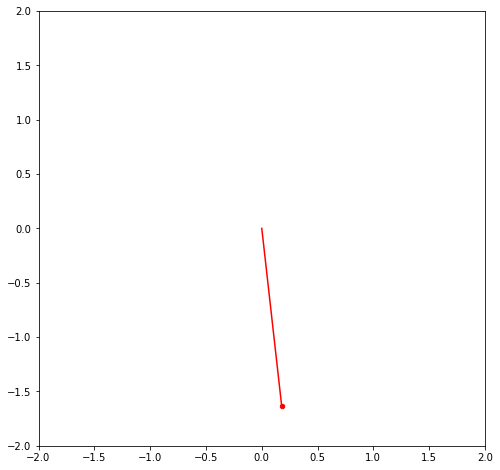

In [58]:
x = (l+ans[:,2])*np.sin(ans[:,0])
y = (l+ans[:,2])*np.cos(ans[:,0])
fig, ax = plt.subplots(1,1,figsize=(8,8))
def update(i):
# clear the axis each frame
    ax.clear()
    # replot things
    ax.scatter(x[i], y[i],s = 20, c = 'r')
    ax.plot([0,x[i]],[0,y[i]],c= 'r')
    lim = 2
    ax.set_xlim((-lim, lim))
    ax.set_ylim((-lim, lim))

ani = animation.FuncAnimation(fig, update, frames=1000, interval=1)
ani.save('pendulum_spring.gif',writer='pillow',fps=25)
